In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


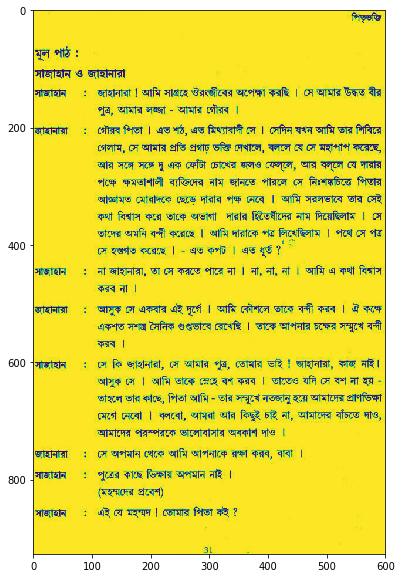

In [40]:
## (1) read
img = cv2.imread("bangla.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray)
plt.show()

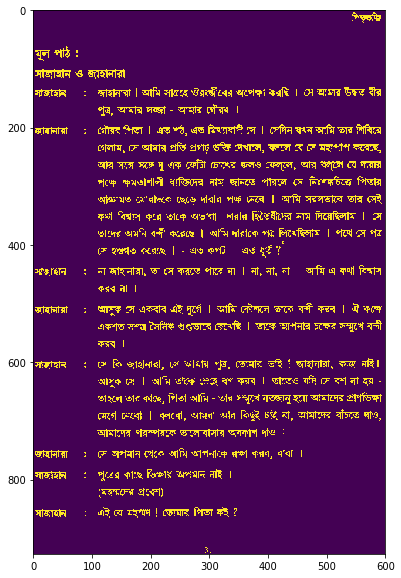

In [42]:
## (2) threshold
th, threshed = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
plt.figure(figsize=(10,10))
plt.imshow(threshed)
plt.show()

In [43]:
## (3) minAreaRect on the nozeros
pts = cv2.findNonZero(threshed) # returns locations of nonzero pixels
ret = cv2.minAreaRect(pts) # Finds a rotated rectangle of the minimum area enclosing the input 2D point set.

(cx,cy), (w,h), ang = ret
if w>h:
    w,h = h,w
    ang += 90
ret

((298.5, 463.5), (591.0, 923.0), -0.0)

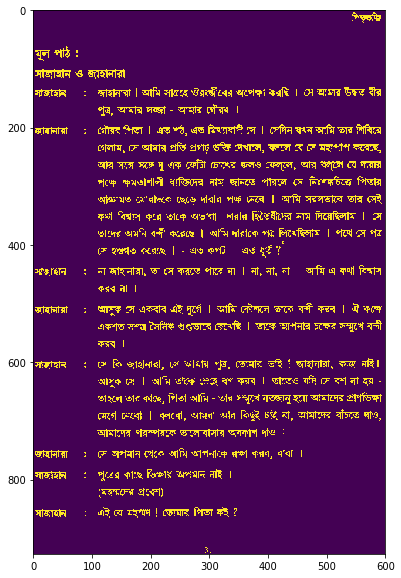

In [45]:
## (4) Find rotated matrix, do rotation
M = cv2.getRotationMatrix2D((cx,cy), ang, 1.0)  # Calculates an affine matrix of 2D rotation.
rotated = cv2.warpAffine(threshed, M, (img.shape[1], img.shape[0])) # Applies an affine transformation to an image.
plt.figure(figsize=(10,10))
plt.imshow(rotated)
plt.show()

In [46]:
## (5) find and draw the upper and lower boundary of each lines
hist = cv2.reduce(rotated,1, cv2.REDUCE_AVG).reshape(-1)

th = 2
H,W = img.shape[:2]
uppers = [y for y in range(H-1) if hist[y]<=th and hist[y+1]>th]
lowers = [y for y in range(H-1) if hist[y]>th and hist[y+1]<=th]

rotated = cv2.cvtColor(rotated, cv2.COLOR_GRAY2BGR)
for y in uppers:
    cv2.line(rotated, (0,y), (W, y), (255,0,0), 1)

for y in lowers:
    cv2.line(rotated, (0,y), (W, y), (0,255,0), 1)

cv2.imwrite("result.png", rotated)

True

Output Image : 
--

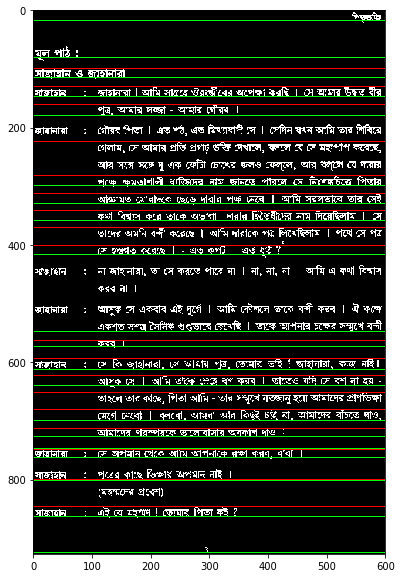

In [47]:
plt.figure(figsize=(10,10))
plt.imshow(rotated)
plt.show()

In [25]:
merged = list(set(uppers+lowers))
merged.sort()

In [26]:
merged[:10]

[3, 17, 66, 80, 83, 85, 99, 115, 130, 147]

In [27]:
uppers[:10]

[3, 66, 83, 99, 130, 161, 194, 224, 255, 282]

In [28]:
lowers[:10]

[17, 80, 85, 115, 147, 179, 211, 243, 274, 299]

In [29]:
sets = []
i = 0
while(i<len(merged)):
    sets.append((merged[i],merged[i+1]))
    i+=2

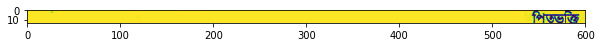

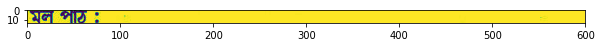

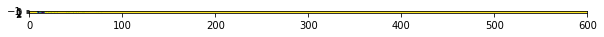

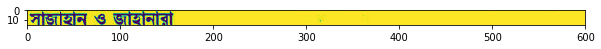

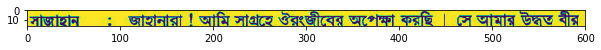

In [53]:
for i in range(5):
    x = gray[sets[i][0]:sets[i][1],:]
    plt.figure(figsize=(10,10))
    plt.imshow(x)
    plt.show()